Reproduce Fig 10.2 in Page 340, ESL

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from numpy.random import default_rng
rng = default_rng(1)
from scipy.stats import chi2

In [2]:
N_train = 2000
N_test  = 10000
X_train = rng.standard_normal((N_train, 10))
X_test  = rng.standard_normal((N_test, 10))
Y_train = np.sum(X_train ** 2, axis=1) < chi2.ppf(0.5, 10)
Y_test  = np.sum(X_test  ** 2, axis=1) < chi2.ppf(0.5, 10)

In [3]:
single_stump = tree.DecisionTreeClassifier(max_leaf_nodes=2)
single_stump.fit(X_train, Y_train)
single_stump_err = 1.0 - accuracy_score(Y_test, single_stump.predict(X_test))
print(single_stump_err)

0.45489999999999997


In [4]:
_244_node_tree = tree.DecisionTreeClassifier(max_leaf_nodes=244)
_244_node_tree.fit(X_train, Y_train)
_244_node_tree_err = 1-accuracy_score(_244_node_tree.predict(X_test), Y_test)
print(_244_node_tree_err)

0.25749999999999995


In [5]:
G, alpha, M = [], [], 400
w = np.array([1.0/N_train]*N_train)

In [6]:
for i in range(M):
    dtc = tree.DecisionTreeClassifier(max_leaf_nodes=2)
    dtc.fit(X_train, Y_train, sample_weight=w)
    Y_train_hat = dtc.predict(X_train)
    err = np.sum((Y_train_hat!=Y_train)*w)/np.sum(w)
    alpha_i = np.log((1-err)/err)
    w = w * np.exp(alpha_i * (Y_train_hat != Y_train))
    G.append(dtc)
    alpha.append(alpha_i)

In [7]:
ite_err_s = []
nrep = 1
for n in range(nrep):
    iterations_err = []
    X_test  = rng.standard_normal((N_test, 10))
    Y_test  = np.sum(X_test  ** 2, axis=1) < chi2.ppf(0.5, 10)
    Y_test_hat = np.zeros(N_test)
    for i in range(M):
        tmp = 0 + G[i].predict(X_test)
        tmp [ tmp == 0 ] = -1
        Y_test_hat += alpha[i] * tmp 
        iterations_err.append(1-accuracy_score(np.sign(Y_test_hat) == 1, Y_test))
    ite_err_s.append(iterations_err)

In [8]:
iterations_err = np.mean(np.array(ite_err_s), axis=0)

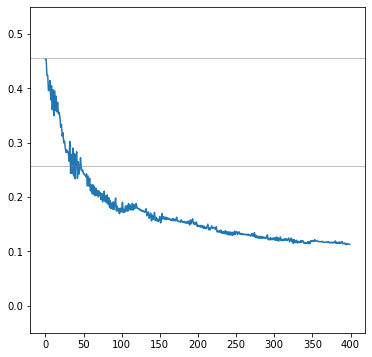

In [11]:
fig= plt.figure(figsize=(6, 6))
ax = fig.gca()
# ax.plot(range(400), np.array(ite_err_s).T)
ax.plot(range(0, 400), np.array(ite_err_s)[0,:])
ax.axhline(single_stump_err, color='gray', linewidth=0.5)
ax.axhline(_244_node_tree_err, color='gray', linewidth=0.5)
plt.ylim(-0.05, 0.55)
plt.show()

In [ ]:
# fig= plt.figure(figsize=(24, 6))
# ax = fig.gca()
# ax.plot(range(M), iterations_err)
# ax.axhline(single_stump_err, color='gray', linewidth=0.5)
# ax.axhline(_244_node_tree_err, color='gray', linewidth=0.5)
# plt.ylim(-0.05, 0.55)
# plt.show()